### Labb Dataprocessing



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# a 
college = pd.read_csv("Data/College.csv")

print(college)

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [3]:
#b
college2 = pd.read_csv ("Data/College.csv" , index_col =0)
college3 = college.rename ({"Unnamed: 0": "College"} , axis =1)
college3 = college3.set_index ("College")
print(college3)
college = college3

                               Private   Apps  Accept  Enroll  Top10perc  \
College                                                                    
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

           

In [4]:
# c
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

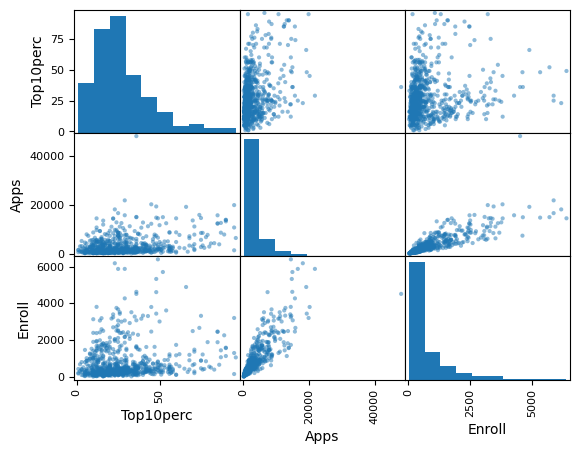

In [5]:
# d
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

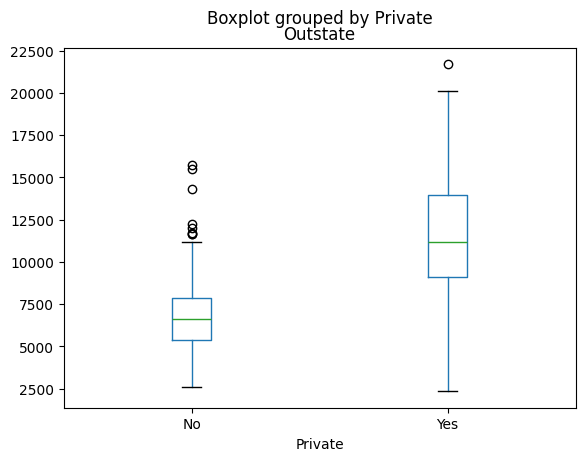

In [6]:
# e
pd.plotting.boxplot(college, column="Outstate", by="Private", grid=False)


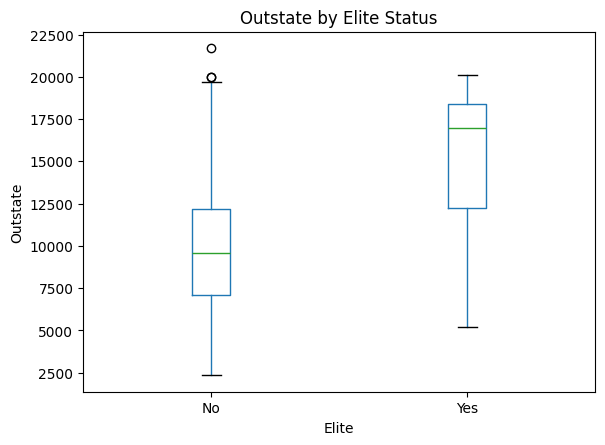

In [7]:
# f
college["Elite"] = pd.cut(college["Top10perc"], bins=[0, 50, 100], labels=["No", "Yes"])

college["Elite"].value_counts()

college.boxplot(column="Outstate", by="Elite", grid=False)
plt.title("Outstate by Elite Status")
plt.suptitle("")
plt.xlabel("Elite")
plt.ylabel("Outstate")
plt.show()

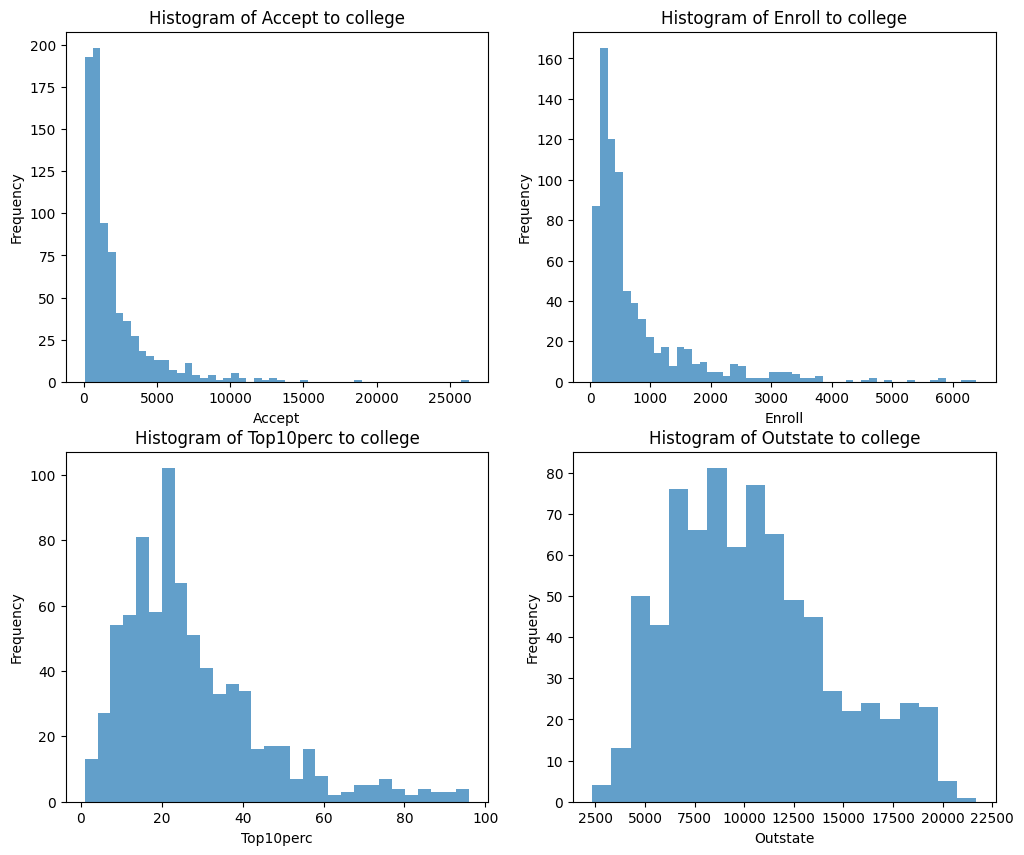

In [ ]:
# g
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
colums_plot = ["Accept", "Enroll", "Top10perc", "Outstate"]
diff_bins = [50, 50, 30, 20]
axes = axes.flatten()

for i, col in enumerate(colums_plot):
    college[col].plot.hist(ax=axes[i], bins=diff_bins[i], alpha=0.7)
    axes[i].set_title(f'Histogram of {col} to college')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()



***Uppgift h***

Försöker hitta samband skillnader/likheter ekonmiskt att gå på privat eller offentligt collage.

In [30]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Elite'],
      dtype='object')

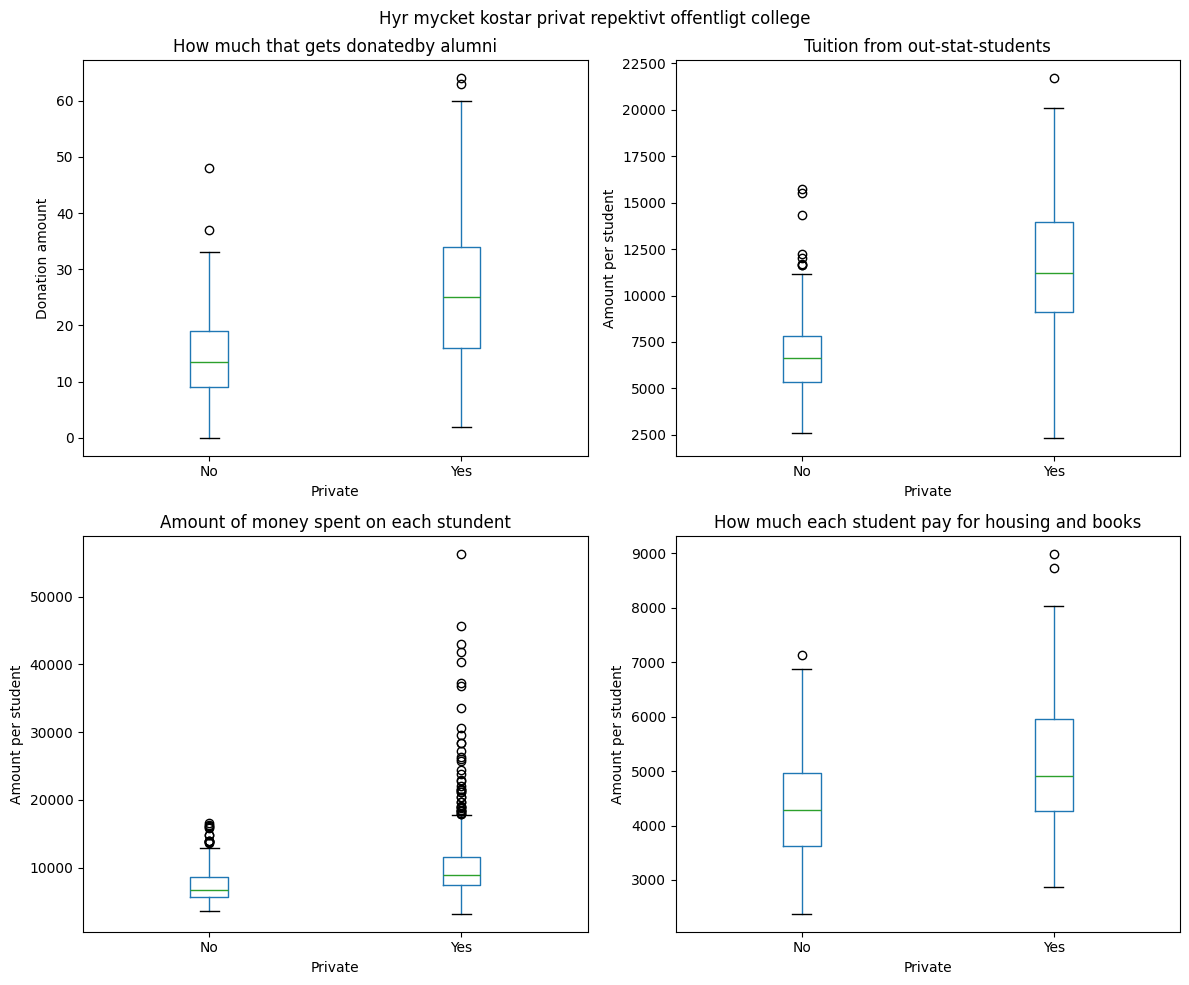

In [67]:
#h

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


college.boxplot(column="perc.alumni", by="Private", grid=False, ax=axes[0, 0])
axes[0, 0].set_title(f"How much that gets donatedby alumni")
axes[0, 0].set_ylabel("Donation amount")

college.boxplot(column="Outstate", by="Private", grid=False, ax=axes[0, 1])
axes[0, 1].set_title(f"Tuition from out-stat-students")
axes[0, 1].set_ylabel("Amount per student")

college.boxplot(column="Expend", by="Private", grid=False, ax=axes[1, 0])
axes[1, 0].set_title(f"Amount of money spent on each stundent")
axes[1, 0].set_ylabel("Amount per student")

college["Student spending"] = college["Books"] + college["Room.Board"]
college.boxplot(column="Student spending", by="Private", grid=False, ax=axes[1, 1])
axes[1, 1].set_title(f"How much each student pay for housing and books")
axes[1, 1].set_ylabel("Amount per student")


fig.suptitle("Hyr mycket kostar privat repektivt offentligt college")
fig.tight_layout()
plt.show()

Vad vi kan se är att privat college har mer och spenderar mer på sina studenter. För skolavgiften är högre än offentliga och mer doneras till skolorna om dom är privata. Dom spendera mycket mer per elev också än dom offentliga. 
Medans också eleven själv också lägger mer pengar för kunna studera på privat skolanar i form av högra boende och undervisnings matrial kosanader. 